# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Homework Assignment 4
# Due date: 9th January 2025
## Save the notebook with your name and submit it by the due date.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from IPython.display import Image

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset

from sklearn.svm import LinearSVC


## Data overview

In this assignment, we will be working with the infamous Titanic dataset, which contains information about the passengers who boarded the Titanic ship. This dataset is a widely used resource in data science for learning about data analysis, feature engineering, and machine learning.

The dataset provides details such as passenger demographics, ticket information and etc.

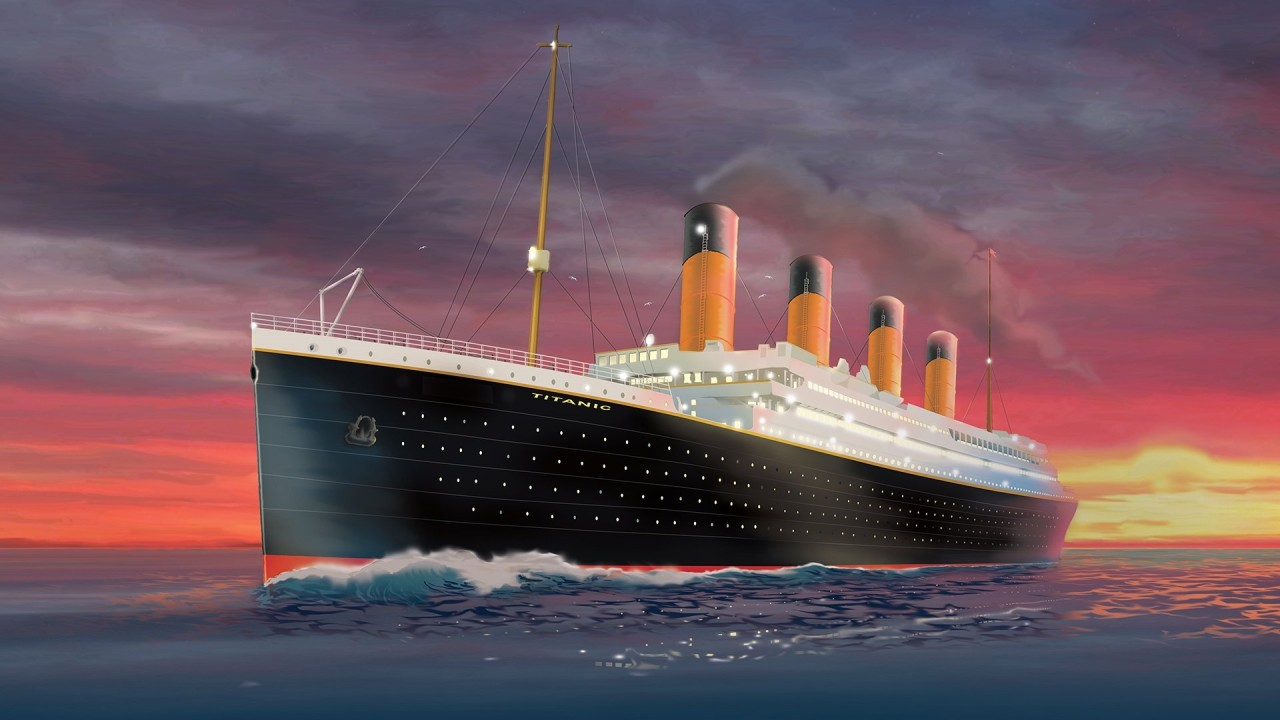

In [2]:
Image(filename='titanic.jpg')

## Data Loading

In [3]:
train_df = pd.read_csv('ti_train.csv')
test_df = pd.read_csv('ti_test.csv')

In [4]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,2,2,0
1,1,1,38.0,1,0,71.2833,0,2,0
2,3,1,26.0,0,0,7.9250,2,1,1
3,1,1,35.0,1,0,53.1000,2,2,0
4,3,0,35.0,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2,1,1
887,1,1,19.0,0,0,30.0000,2,1,1
888,3,1,28.0,1,2,23.4500,2,4,0
889,1,0,26.0,0,0,30.0000,0,1,1


In [5]:
test_df = test_df.drop(['PassengerId'], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,34.5,0,0,7.8292,1,1,1
1,3,1,47.0,1,0,7.0000,2,2,0
2,2,0,62.0,0,0,9.6875,1,1,1
3,3,0,27.0,0,0,8.6625,2,1,1
4,3,1,22.0,1,1,12.2875,2,3,0
...,...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,2,1,1
414,1,1,39.0,0,0,108.9000,0,1,1
415,3,0,38.5,0,0,7.2500,2,1,1
416,3,0,27.0,0,0,8.0500,2,1,1


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1 (0.2pt)
    
### 1a: You are given an already implemented sklearn Logistic Regression model that is poorly fitted on the Titanic dataset. Investigate and find a way to fix the problem and improve the model's performance on the dataset.
### 1b: Evaluate the model's performance on the test set (accuracy, confusion matrix..etc.)

</div>

### In this assignment, we will use train, validation and test sets
- Train Set: Used to train the model.
- Validation Set: Used to tune hyperparameters and evaluate different models. 
- Test Set: Used to evaluate the model's performance after training. This set is not used during training or model selection.

## Our objective to predict whether passengers on the ship were alone or not. This is a binary classification problem.

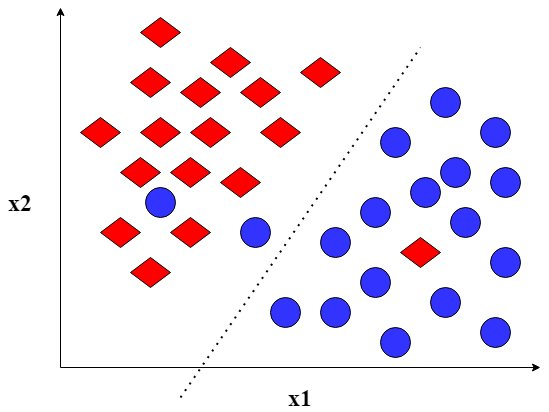

In [6]:

Image(filename='binary.jpg')

In [7]:

X = train_df.drop(['IsAlone'], axis=1)
y = train_df['IsAlone']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42)

In [8]:

X_test = test_df.drop(['IsAlone'], axis=1)
y_test= test_df['IsAlone']

### Our Logistic Regression Model

In [9]:

lr_model = LogisticRegression(max_iter=150)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [10]:

y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")

print(f"\nValidation Accuracy: {val_accuracy:.4f}")


Training Accuracy: 1.0000

Validation Accuracy: 1.0000


In [11]:
# Task 1a

# The model is perfect since the data is perfectly linearly separable. I can not find any way to optimize it furter since it hase both 100% on the validation data and the test data. 

Test accuracy: 1.0


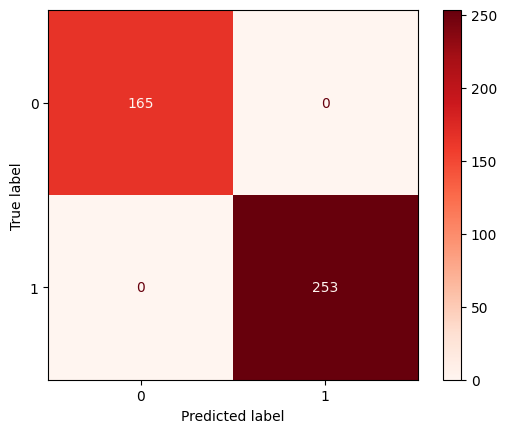

In [12]:
# Task 1b

# First, we check how well the model generalized on the test set
y_test_pred = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy}")


# The consusion matrix gives us no further information since we all the predicted lables were correct
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Reds')
plt.show()


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2 (0.4pts)
### 2a: Implement a simple feedforward neural network to predict whether passengers were alone or not on the ship.
### 2b: Evaluate the model's performance on the test set (accuracy, confusion matrix..etc.).

</div>

In [13]:
# Task 2a

#Setting the seed
torch.manual_seed(42)

# Creating the model class
class SimpleNN(nn.Module):
    def __init__(self, in_features, n_neurons, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features, n_neurons),
            nn.Sigmoid(),
            nn.Linear(n_neurons, n_neurons)
        )
        self.final_layer = nn.Linear(n_neurons, num_classes)

    def forward(self, data):
        tmp = self.layers(data)
        pred = self.final_layer(tmp)
        return pred

# Defining the training function
def train(model, optimizer, criterion, epochs, dataloader, disp_loss=False):
    losses = []
    for i in range(epochs):
        for X_batch, y_batch in dataloader:
            y_pred = model.forward(X_batch)

            loss = criterion(y_pred, y_batch)
            losses.append(loss.detach().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if i % 25 == 0 and disp_loss==True:
            print(f'loss for epoch {i}: {losses[i]}')
    print(f'Final loss after training: {losses[-1]} ')

# Creating a model instance as well as loss function and optimizer
nn_model = SimpleNN(X_train.shape[1], 12, 2)
adam_optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-3)
cross_entropy_criterion = nn.CrossEntropyLoss()

# Preprocessing the data into tensors with the correct datatype
tensor_X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
tensor_y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
dataset = TensorDataset(tensor_X_train, tensor_y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# performing the training
train(nn_model, adam_optimizer, cross_entropy_criterion, 500, dataloader)

Final loss after training: 0.00020075877546332777 


Test accuracy: 99.28%


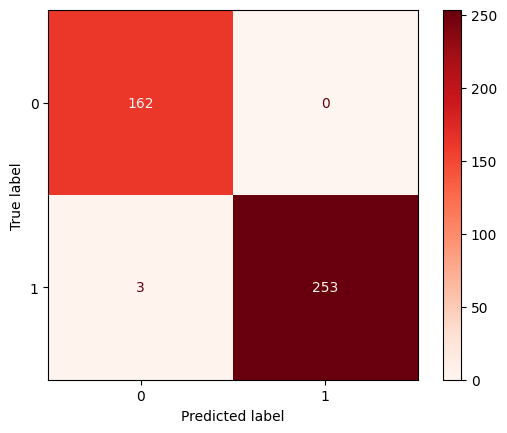

In [14]:
# Task 2b

# Converting the test set to tensor
tensor_X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

# defining a prediction function that returns the lables as an array
def make_prediction(model, X_test):
    model.eval()
    with torch.no_grad():  
        predictions = nn_model(X_test)
    predicted_classes = torch.argmax(predictions, dim=1)
    model.train()
    return np.array(predicted_classes)

# Making a prediction and calculating the accuracy
nn_pred = make_prediction(nn_model, tensor_X_test)
nn_test_acc = accuracy_score(nn_pred, y_test.values)
print(f"Test accuracy: {np.round(nn_test_acc*100, 2)}%")

# Creating and plotting a confution matrix for further evaluation
nn_cm = confusion_matrix(nn_pred, y_test.values)
disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=lr_model.classes_)
disp.plot(cmap='Reds')
plt.show()

# We could do a ROC plot for further evaluation, but it will not produce any more insight than the confusion matrix, since the line would be almost completely perfect and thus 
# harder to evalueate than the confusion matrix

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3 (0.3pts)
### 3a: In your lectures, you covered fundamental machine learning methods such as Support Vector Machines, Decision Trees and Ensemble Methods. Chose one appropriate method from these and train it to predict whether passengers were alone or not on the ship.
    
### 3b: Evaluate the model's performance on the test set (accuracy, confusion matrix..etc.).


</div>

Test accuracy: 99.76%


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


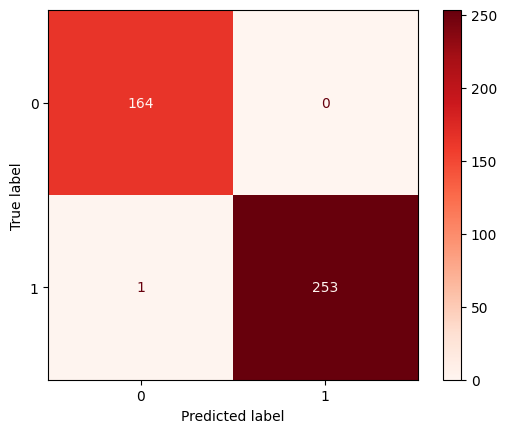

In [15]:
# Task 3a

# Since the data seems to be perfectly linearly separable, i will implement linear support vector machines to be able to implement a model that will generalize better by
# being more robust against outlisers whilst also increasing the chanses of it generalizing better on new unseen data. 

# Creating a model instance with the default parameters
svm_model = LinearSVC().fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_test_acc = accuracy_score(y_true=y_test, y_pred=svm_pred)
print(f"Test accuracy: {np.round(svm_test_acc*100, 2)}%")

# The default parameteres for linear SVM produce very good results, so there is no need for tuning the C parameter.

# Creating and plotting a confution matrix for further evaluation
smv_cm = confusion_matrix(svm_pred, y_test.values)
disp = ConfusionMatrixDisplay(confusion_matrix=smv_cm, display_labels=lr_model.classes_)
disp.plot(cmap='Reds')
plt.show()

# Again, we could plot ROC, but it will not help us evaluate the data any better. 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4 (0.1pts)
### Compare and contrast the results from you obtained from the Logistic Regression, Neural Network and the additional model on the test set. Which one peformed better and why do you think so?


</div>

## Logistic regression
I was really confused to with the first task, since we were supposed to be given a poorly fitted model, but the one we got was 100% accurate on both the validation and the test set. I lowered the maximum number of iterations to possibly save some computations whilst still achieving the same results, but I suppose this is very insigniicant. 

Since logistic regression is by far most intuitive out of the three, I believe it is the best choice. Predicting the 'IsAlone' feature in this dataset is kind of trivial, since new data will not be produced due to the data being specific to one event. Therefore, it does not matter that logistic regression might be sensitive to outlisers since we already achieved what we wanted. 

One might be suspicious that something is wrong with the implementation due to the 100% accuracy, but i found no signs of data leakage or overfitting. I believe that the data is perfectly linearly separable and the fact that I later get very close to 100% accuracy with linear SVM I believe confirms my suspicions. 

## Neural network
Whilst neural networks is the state-of-the-art in the field right now, they are very computationally intensive as opposed to algorightms such as logistic regression and support vector machines. For this dataset, I believe that the neural network is unnecessarily complex for the task at hand. 

Whilst the network I have implemented is very simple and technically produce the worst accuracy on the test set out of the three algorithms, I believe it to be possible to make it produce 100% accuracy on this test. This is however not nesessary, since the much simpler logistic regression which can be implemented in just a few lines of code already produce this result. 

## Linear support vector machines 
Like previously mentioned, i choose this approch since we have already examined the data to be linearly separable. Support vector machines are generally more robust against outliers and typically work better in higher dimensions, but for this dataset that seems irrelevant. On my first iteration of the implementation of the support vector machines, i simply tried the default parameters, which produced such a good result that it was not nessecary to tweak them any further. 

Out of the three, support vector machines might be the best model on paper for an application like this, but since logistic regression produce the same results and is a much more intuitive algorithm, i believe that it is generally better to go with that alterantive. On similar applications in other domains however, SVM is possibly better due to it being better at generalizing on new data.  